<img src="./recursos/logoutn.jpg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Trabajo semanal 2

Autor: *Farcy Facundo*


In [29]:
from IPython.display import IFrame
IFrame("./recursos/TS2.pdf", width=1000, height=1000)


### Ejercicio 3

Para corroborar en python simulo la siguiente función hallada en el ejercicio 2:

\begin{equation}
H(s) = \frac{s\frac{\omega_0}{Q}}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

que con los componentes normalizados (y sus respectivas normalizaciones) quedaría:
\begin{equation}
H(s) = \frac{s'\frac{1}{R'*C'}}{(s')^2+s'\frac{1}{R'*C'}+\frac{r4'}{r1'*r3'*r4'*r5'*C2'*C'}}, \quad \ohm_\omega = 10, \quad \ohm_Y = 10, 
\end{equation}




Al simular con python...

In [12]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [13]:

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s


In [30]:
# Comienzo de la simulación
oh_w=10
oh_y=10

r1=1E2
r2=r3=r4=r5=1E3
c2=100E-9
r=120E9
c=25E-9
# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ 1/(r*c) ])
den = np.array([ 1., 1/(r*c), r4/(r1*r3*r4*c2)*1/c])

H1 = sig.TransferFunction( num, den )

# mostramos la transferencia construida
pretty_print_bicuad_omegayq(num,den)

<IPython.core.display.Math object>

In [25]:
#desconozco si hay función para desnormalizar automaticamente. En mi caso manualmente me quedaría
r1=r1*oh_y
r3=r3*oh_y
r4=r4*oh_y
r5=r5*oh_y
c2=c2*oh_y/oh_w
c=c*oh_y/oh_w
r=r*oh_y

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ 1/(r*c) ])
den = np.array([ 1., 1/(r*c), r4/(r1*r3*r4*c2)*1/c])

H1 = sig.TransferFunction( num, den )

# mostramos la transferencia construida
pretty_print_bicuad_omegayq(num,den)

<IPython.core.display.Math object>

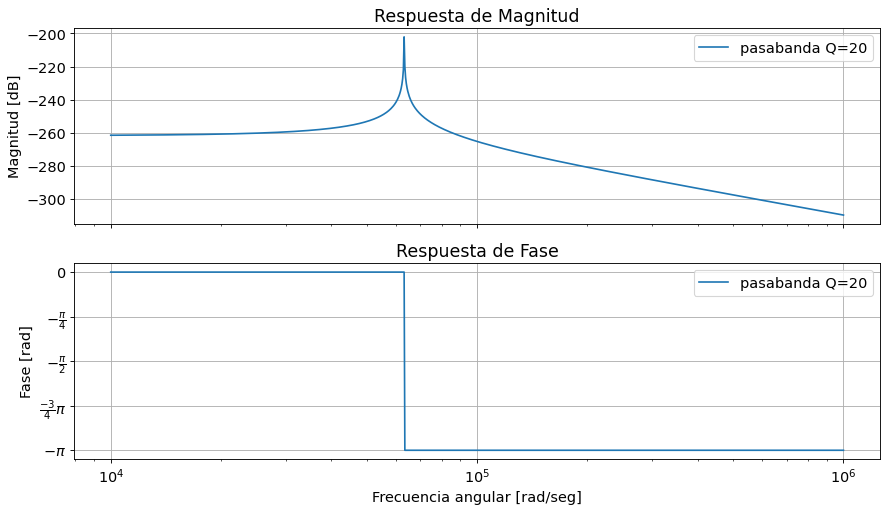

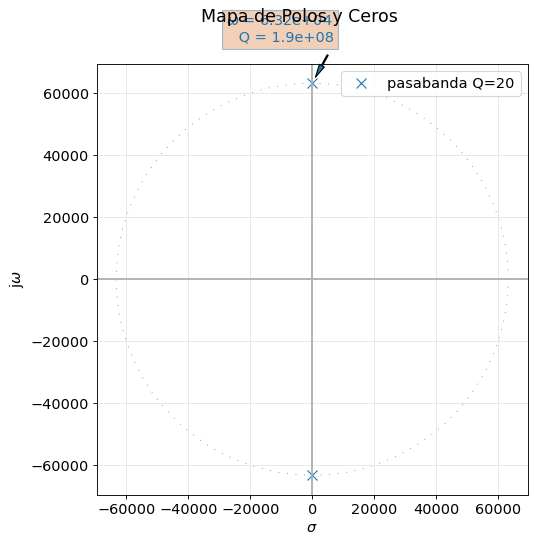

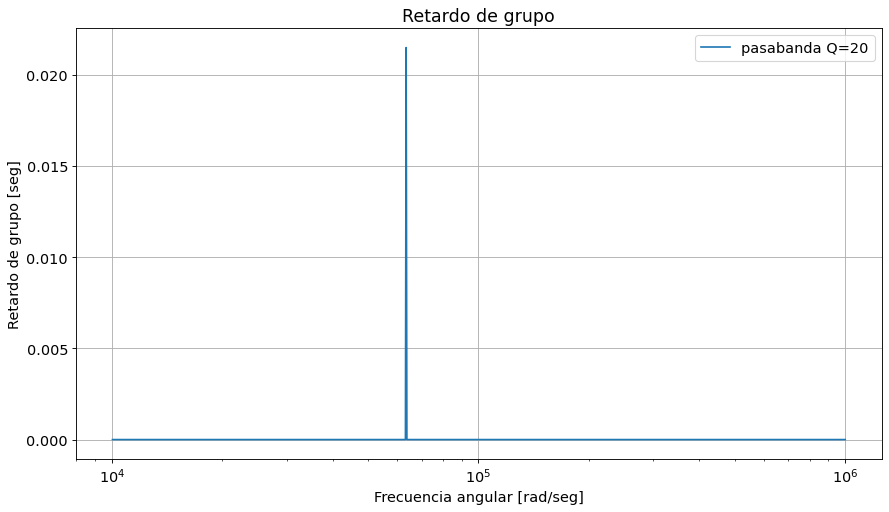

In [34]:
_ = analyze_sys([H1], sys_name='pasabanda Q=20')